<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Overview</b></font>


This script tackles the task of predicting house prices, as outlined in the Kaggle competition "House Prices - Advanced Regression Techniques." The challenge involves using 79 explanatory variables to predict the sales prices of houses in Ames, Iowa, emphasizing feature engineering and advanced regression techniques. For more details and the dataset, visit the competition page: [House Prices Competition](https://kaggle.com/competitions/house-prices-advanced-regression-techniques).

In [1]:
import pandas as pd

test_data = pd.read_csv("/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/test.csv")
train_data = pd.read_csv("/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/train.csv")

In [2]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

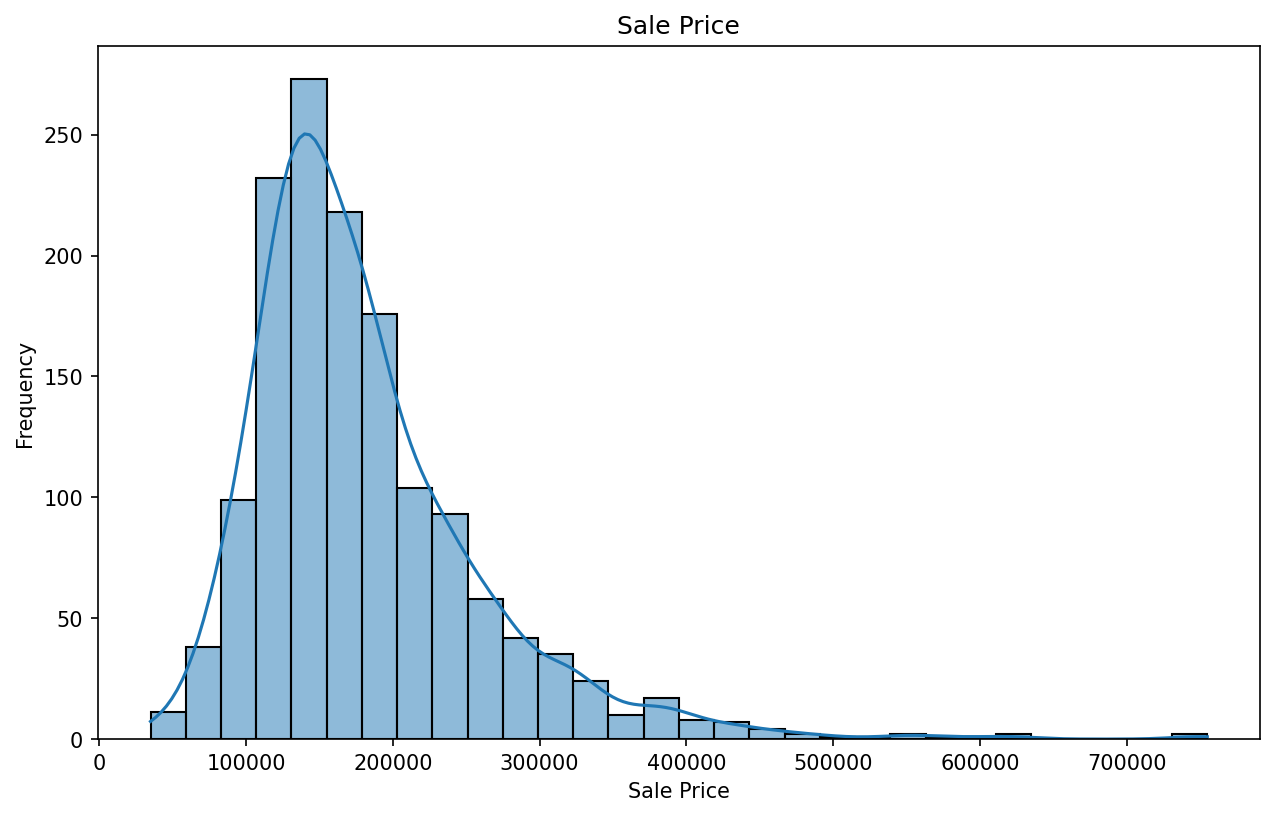

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution of predicted SalePrice
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Ordinary Least Squares</b></font>

In [6]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming train_data and test_data are already loaded

# Preprocess Training Data
# Fill in missing values for numerical features
train_data.fillna(train_data.mean(), inplace=True)

# Convert infinite values to NaN and then fill or drop them
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(train_data.mean(), inplace=True)  # or another appropriate method

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data)

# Separate the features and the target variable
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Preprocess Test Data
# Fill in missing values for numerical features
test_data.fillna(test_data.mean(), inplace=True)

# Convert infinite values to NaN and then fill or drop them
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.fillna(test_data.mean(), inplace=True)  # or another appropriate method

# Ensure test_data has the same columns as X_train, add missing columns with default value 0
test_data = pd.get_dummies(test_data)
test_data = test_data.reindex(columns = X_train.columns, fill_value=0)

# Predict the SalePrice for the test data
predictions = model.predict(test_data)


# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": predictions
})

# Specify your desired file path
file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/ols_predictions.csv'

# Save the DataFrame to a CSV file
submission.to_csv(file_path, index=False)

print(f'Submission file has been saved to {file_path}')

Submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/ols_predictions.csv


/var/folders/z3/bkgw4vw17fx7qmlcf7_4tdd00000gn/T/ipykernel_96830/2901733240.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
/var/folders/z3/bkgw4vw17fx7qmlcf7_4tdd00000gn/T/ipykernel_96830/2901733240.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)  # or another appropriate method
/var/folders/z3/bkgw4vw17fx7qmlcf7_4tdd00000gn/T/ipykernel_96830/2901733240.py:30: FutureWarning: The default value of numeric_only in DataFrame

In [7]:
submission

,Id,SalePrice
0,1461,84777.051969
1,1462,133077.512010
2,1463,159028.327963
3,1464,169367.280179
4,1465,177608.441099
...,...,...
1454,2915,58177.352307
1455,2916,53677.427528
1456,2917,153147.487421
1457,2918,89103.162955


In [8]:
# Print the summary of the model
#print(model.summary())

<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Performance on Kaggle</b></font>

This basic OLS (Ordinary Least Squares) prediction model achieved a score of 0.729 in the Kaggle competition's submission segment.

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Random Forest Regressor</b></font>

In [9]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Note: Preprocessing steps for train_data and test_data must have been completed here.

# Assuming train_data and test_data have been preprocessed up to the point of OLS model fitting

# Preparing X_train and y_train for Random Forest, assuming 'SalePrice' is the target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
# Ensure 'Id' and potentially 'const' columns are not included in the model fitting
X_train_rf = X_train.drop(columns=['Id', 'const'], errors='ignore')
rf_model.fit(X_train_rf, y_train)

# Prepare the test data for Random Forest prediction
# Make sure to drop 'Id' and 'const' columns if they were included during OLS preprocessing
test_features_rf = test_data.drop(columns=['Id', 'const'], errors='ignore').reindex(columns=X_train_rf.columns)

# Predict the SalePrice for the test data with the Random Forest model
rf_predictions = rf_model.predict(test_features_rf)


# Prepare the submission DataFrame for Random Forest predictions
rf_submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": rf_predictions
})

# Specify the file path for saving the Random Forest predictions
rf_file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/rf_predictions.csv'

# Save the Random Forest predictions to a CSV file
rf_submission.to_csv(rf_file_path, index=False)

print(f'Random Forest submission file has been saved to {rf_file_path}')


Random Forest submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/rf_predictions.csv


In [10]:
rf_submission

,Id,SalePrice
0,1461,129141.66
1,1462,155471.00
2,1463,183317.69
3,1464,183719.02
4,1465,198172.91
...,...,...
1454,2915,86795.00
1455,2916,85731.41
1456,2917,152076.59
1457,2918,114218.65


<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Model Performance on Kaggle</b></font>

The Random Forest prediction model registered a modest score of 0.148 in the Kaggle competition's submission phase, which is significantly lower than the OLS model's result.

Top 20 Feature Importances:
OverallQual          0.580209
GrLivArea            0.110475
TotalBsmtSF          0.037260
BsmtFinSF1           0.030574
2ndFlrSF             0.028984
GarageCars           0.025570
1stFlrSF             0.023928
GarageArea           0.012839
LotArea              0.012102
YearBuilt            0.008802
FullBath             0.008142
YearRemodAdd         0.007646
LotFrontage          0.006600
TotRmsAbvGrd         0.006032
MasVnrArea           0.005875
OpenPorchSF          0.004875
BsmtUnfSF            0.004411
GarageYrBlt          0.004378
WoodDeckSF           0.004315
OverallCond          0.004006
Fireplaces           0.003417
MoSold               0.003128
BsmtQual_Ex          0.003083
KitchenQual_Gd       0.002129
GarageType_Detchd    0.002056
MSSubClass           0.001949
BsmtQual_Gd          0.001860
BedroomAbvGr         0.001719
GarageType_Attchd    0.001662
MSZoning_RM          0.001652
dtype: float64


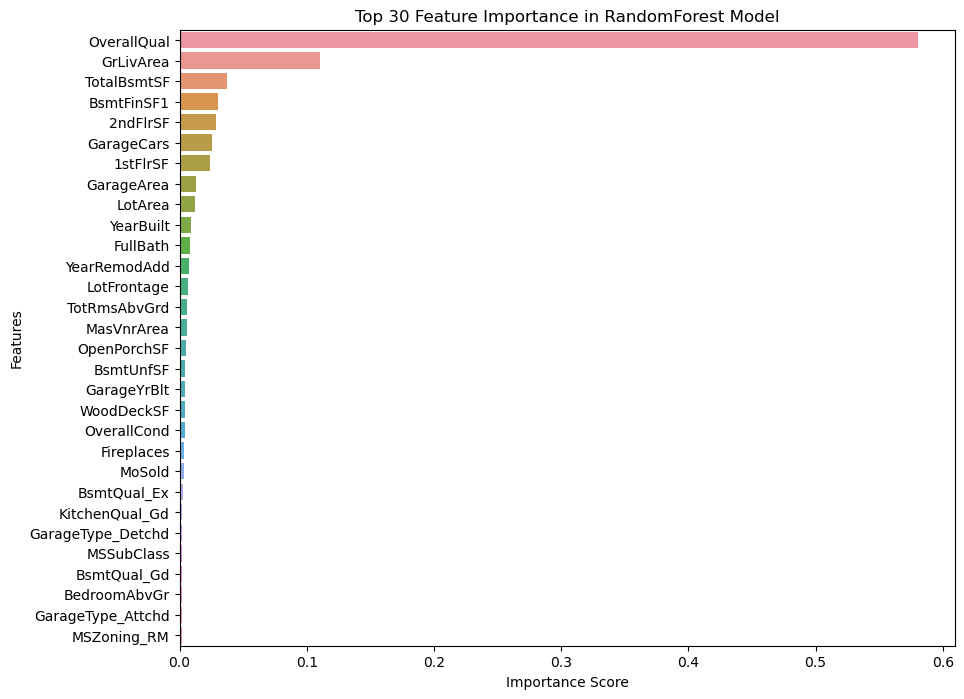

In [11]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a pandas Series to associate feature names with their importance scores
importances = pd.Series(feature_importances, index=X_train_rf.columns)

# Sort the importances in descending order and select the top 30
sorted_importances = importances.sort_values(ascending=False)[:30]

print("Top 20 Feature Importances:")
print(sorted_importances)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index)
plt.title('Top 30 Feature Importance in RandomForest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>XGBRegressor</b></font>

In [12]:
from xgboost import XGBRegressor
import pandas as pd

# Assuming train_data and test_data have been preprocessed up to the point of OLS model fitting

# Preparing X_train and y_train for XGBoost, assuming 'SalePrice' is the target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=10000, 
    learning_rate=0.9, 
    gamma=0.01, 
    subsample=1, 
    colsample_bytree=1, 
    max_depth=5, 
    reg_lambda=1  # Adds L2 regularization to the weights
)

# Fit the XGBoost model
# Ensure 'Id' and potentially 'const' columns are not included in the model fitting
X_train_xgb = X_train.drop(columns=['Id', 'const'], errors='ignore')
xgb_model.fit(X_train_xgb, y_train)

# Prepare the test data for XGBoost prediction
# Make sure to drop 'Id' and 'const' columns if they were included during OLS preprocessing
test_features_xgb = test_data.drop(columns=['Id', 'const'], errors='ignore').reindex(columns=X_train_xgb.columns)

# Predict the SalePrice for the test data with the XGBoost model
xgb_predictions = xgb_model.predict(test_features_xgb)

# Prepare the submission DataFrame for XGBoost predictions
xgb_submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": xgb_predictions
})

# Specify the file path for saving the XGBoost predictions
xgb_file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/xgb_predictions.csv'

# Save the XGBoost predictions to a CSV file
xgb_submission.to_csv(xgb_file_path, index=False)

print(f'XGBoost submission file has been saved to {xgb_file_path}')


XGBoost submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/xgb_predictions.csv


In [13]:
xgb_submission

,Id,SalePrice
0,1461,106562.484375
1,1462,146375.546875
2,1463,193119.000000
3,1464,203098.781250
4,1465,153288.156250
...,...,...
1454,2915,77974.531250
1455,2916,66029.609375
1456,2917,132457.906250
1457,2918,125567.218750


<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Model Performance on Kaggle</b></font>

The XGBoost prediction model registered a modest score of 0.195 in the Kaggle competition's submission phase, which is significantly lower than the OLS model's result.

<font color='DarkMagenta' size='11' style='line-height: 1.01;'><b>Lasso</b></font>

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming train_data and test_data are already loaded

# Preprocess Training Data
# Fill in missing values for numerical features
train_data.fillna(train_data.mean(), inplace=True)

# Convert infinite values to NaN and then fill or drop them
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(train_data.mean(), inplace=True)  # or another appropriate method

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data)

# Separate the features and the target variable
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# It's often a good idea to scale your data for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the Lasso model
lasso_model = Lasso(alpha=1)  # You can adjust the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Preprocess Test Data in the same way as Training Data
test_data.fillna(test_data.mean(), inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.fillna(test_data.mean(), inplace=True)
test_data = pd.get_dummies(test_data)
test_data = test_data.reindex(columns = X_train.columns, fill_value=0)

# Don't forget to scale the test data as well
X_test_scaled = scaler.transform(test_data.drop('SalePrice', axis=1, errors='ignore'))  # Ensure 'SalePrice' is not in test data

# Predict the SalePrice for the test data
predictions = lasso_model.predict(X_test_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": predictions
})

# Specify your desired file path
file_path = '/Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/lasso_predictions.csv'

# Save the DataFrame to a CSV file
submission.to_csv(file_path, index=False)

print(f'Submission file has been saved to {file_path}')


Submission file has been saved to /Users/dadmehr/Codes/Python/house-prices-advanced-regression-techniques/lasso_predictions.csv


/Users/dadmehr/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


In [15]:
submission

,Id,SalePrice
0,1461,113385.251741
1,1462,161367.066084
2,1463,187614.532829
3,1464,197886.039108
4,1465,206174.331966
...,...,...
1454,2915,86692.858984
1455,2916,82106.441249
1456,2917,181624.842688
1457,2918,117646.494467


<font color='DarkMagenta' size='6' style='line-height: 1.01;'><b>Model Performance on Kaggle</b></font>

The Lasso prediction model registered a modest score of 0.189 in the Kaggle competition's submission phase, which is significantly lower than the OLS model's result.